### Import data and libraries

In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
train_df = pd.read_excel("C:\\Users\\SHARAD\\Downloads\\Data 1\\Flight_Ticket_Participant_Datasets\\Data_Train.xlsx")
test_df = pd.read_excel("C:\\Users\\SHARAD\\Downloads\\Data 1\\Flight_Ticket_Participant_Datasets\\Test_set.xlsx")

In [69]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [70]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [71]:
big_df = train_df.append(test_df,sort=False)

In [72]:
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [73]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### Feature Engineering

In [74]:
big_df['Date']  = big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year']  = big_df['Date_of_Journey'].str.split('/').str[2]

In [77]:
print(big_df.head())
print('--------------------------------')
print(big_df.dtypes)

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price Date  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0   24   
1    05:50         13:15   7h 25m     2 stops         No info   7662.0    1   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0    9   
3    18:05         23:30   5h 25m      1 stop         No info   6218.0   12   
4    16:50         21:35   4h 45m      1 stop         No info  13302.0   01   

  Month  Year  
0    03  2019  
1    05  2019  
2 

In [78]:
big_df['Date']  = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year']  = big_df['Year'].astype(int)

In [79]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [80]:
big_df = big_df.drop('Date_of_Journey',axis=1)

In [81]:
big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]

In [82]:
big_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [83]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [84]:
big_df['Total_Stops'] = big_df['Total_Stops'].fillna('1 stop')

In [85]:
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop', '0 stop')

In [86]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [87]:
big_df['stop'] = big_df['Total_Stops'].str.split(' ').str[0]

In [88]:
big_df['stop'] = big_df['stop'].astype(int)

In [89]:
big_df = big_df.drop('Total_Stops',axis=1)

In [90]:
big_df['Arrival_Hour']     = big_df['Arrival_Time'].str.split(':').str[0]
big_df['Arrival_Minute']   = big_df['Arrival_Time'].str.split(':').str[1]
big_df['Departure_Hour']   = big_df['Dep_Time'].str.split(':').str[0]
big_df['Departure_Minute'] = big_df['Dep_Time'].str.split(':').str[1]
big_df['Arrival_Hour'] = big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute'] = big_df['Arrival_Minute'].astype(int)
big_df['Departure_Hour'] = big_df['Departure_Hour'].astype(int)
big_df['Departure_Hour'] = big_df['Departure_Hour'].astype(int)

In [91]:
big_df = big_df.drop(['Arrival_Time','Dep_Time'],axis=1)

In [92]:
big_df.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [93]:
big_df['Route_1'] = big_df['Route'].str.split('→ ').str[0]
big_df['Route_2'] = big_df['Route'].str.split('→ ').str[1]
big_df['Route_3'] = big_df['Route'].str.split('→ ').str[2]
big_df['Route_4'] = big_df['Route'].str.split('→ ').str[3]
big_df['Route_5'] = big_df['Route'].str.split('→ ').str[4]
big_df['Route_6'] = big_df['Route'].str.split('→ ').str[5]

In [94]:
big_df['Route_1'].fillna('None',inplace=True)
big_df['Route_2'].fillna('None',inplace=True)
big_df['Route_3'].fillna('None',inplace=True)
big_df['Route_4'].fillna('None',inplace=True)
big_df['Route_5'].fillna('None',inplace=True)
big_df['Route_6'].fillna('None',inplace=True)

In [95]:
big_df = big_df.drop(['Duration','Route'],axis=1)

In [96]:
big_df[big_df['Price'].isnull()]

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,Jet Airways,Delhi,Cochin,No info,NaN,6,6,2019,1,4,25,17,30,DEL,BOM,COK,None,None,None
1,IndiGo,Kolkata,Banglore,No info,NaN,12,5,2019,1,10,20,6,20,CCU,MAA,BLR,None,None,None
2,Jet Airways,Delhi,Cochin,In-flight meal not included,NaN,21,5,2019,1,19,0,19,15,DEL,BOM,COK,None,None,None
3,Multiple carriers,Delhi,Cochin,No info,NaN,21,5,2019,1,21,0,8,00,DEL,BOM,COK,None,None,None
4,Air Asia,Banglore,Delhi,No info,NaN,24,6,2019,0,2,45,23,55,BLR,DEL,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,No info,NaN,6,6,2019,1,20,25,20,30,CCU,DEL,BLR,None,None,None
2667,IndiGo,Kolkata,Banglore,No info,NaN,27,3,2019,0,16,55,14,20,CCU,BLR,None,None,None,None
2668,Jet Airways,Delhi,Cochin,No info,NaN,6,3,2019,1,4,25,21,50,DEL,BOM,COK,None,None,None
2669,Air India,Delhi,Cochin,No info,NaN,6,3,2019,1,19,15,4,00,DEL,BOM,COK,None,None,None


In [97]:
big_df['Price'].fillna(big_df['Price'].mean(),inplace=True)

In [98]:
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
Route_6             0
dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
big_df['Airline'] = encoder.fit_transform(big_df['Airline'])
big_df['Source'] = encoder.fit_transform(big_df['Source'])
big_df['Destination'] = encoder.fit_transform(big_df['Destination'])
big_df['Additional_Info'] = encoder.fit_transform(big_df['Additional_Info'])
big_df['Route_1'] = encoder.fit_transform(big_df['Route_1'])
big_df['Route_2'] = encoder.fit_transform(big_df['Route_2'])
big_df['Route_3'] = encoder.fit_transform(big_df['Route_3'])
big_df['Route_4'] = encoder.fit_transform(big_df['Route_4'])
big_df['Route_5'] = encoder.fit_transform(big_df['Route_5'])
big_df['Route_6'] = encoder.fit_transform(big_df['Route_6'])

### Feature Selection

In [100]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
df_train = big_df[:10683]
df_test = big_df[10683:]
X = df_train.drop('Price',axis=1)
y = df_train['Price']

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [102]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

In [103]:
selected_features = X_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [104]:
X_train = X_train.drop('Year',axis=1)
X_test=X_test.drop(['Year'],axis=1)

### Random Forest Regressor

In [105]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

In [106]:
# number of fetaures to consider at every split
max_features = ['auto','sqrt']

In [107]:
# max level in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

In [108]:
# min sample required for split
min_samples_split = [2,5,10,15,100]

In [109]:
# min samples at each leaf node
min_samples_leaf = [1,2,5,10]

In [110]:
# create a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [111]:
# use the random search to find best hyper parameters
# first create a base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [112]:
# search of parameters
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=50,cv=5,verbose=2,random_state=42,n_jobs=1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

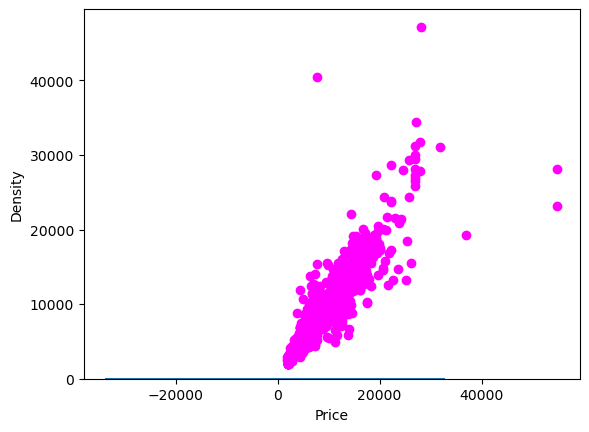

In [114]:
y_pred = rf_random.predict(X_test)
sns.distplot(y_test-y_pred)
plt.scatter(y_test,y_pred,c='magenta')

In [115]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score of Our Model is : ",metrics.r2_score(y_test, y_pred))

MAE: 682.0994835763951
MSE: 2612236.9228306273
RMSE: 1616.2416041021304
R2 Score of Our Model is :  0.8710417248466042
